# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [7]:
model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=64, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      3136      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       131328    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 512)       524800    
__________

### Train

In [8]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch25.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=200,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=100,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Epoch 1/50
200/200 [==============================] - 133s 664ms/step - loss: 5.2565 - acc: 0.0064 - val_loss: 5.1939 - val_acc: 0.0126

Epoch 00001: val_loss improved from inf to 5.19389, saving model to Saved_Models/weights.best.from_scratch25.hdf5
Epoch 2/50
200/200 [==============================] - 127s 635ms/step - loss: 5.1611 - acc: 0.0131 - val_loss: 5.1386 - val_acc: 0.0230

Epoch 00002: val_loss improved from 5.19389 to 5.13856, saving model to Saved_Models/weights.best.from_scratch25.hdf5
Epoch 3/50
200/200 [==============================] - 127s 633ms/step - loss: 5.1185 - acc: 0.0188 - val_loss: 5.0792 - val_acc: 0.0215

Epoch 00003: val_loss improved from 5.13856 to 5.07919, saving model to Saved_Models/weights.best.from_scratch25.hdf5
Epoch 4/50
200/200 [==============================] - 127s 637ms/step - loss: 5.0509 - acc: 0.0247 - val_loss: 5.1441 - val_acc: 0.0226

Epoch 00004: val_loss did not improve from 5.07919
Epoch 5/50
200/200 [==============================]


Epoch 00037: val_loss did not improve from 4.29330
Epoch 38/50
200/200 [==============================] - 127s 637ms/step - loss: 3.0445 - acc: 0.2927 - val_loss: 4.5025 - val_acc: 0.1563

Epoch 00038: val_loss did not improve from 4.29330
Epoch 39/50
200/200 [==============================] - 128s 639ms/step - loss: 3.0213 - acc: 0.2975 - val_loss: 4.5206 - val_acc: 0.1387

Epoch 00039: val_loss did not improve from 4.29330
Epoch 40/50
200/200 [==============================] - 127s 635ms/step - loss: 2.9064 - acc: 0.3194 - val_loss: 4.3391 - val_acc: 0.1598

Epoch 00040: val_loss did not improve from 4.29330
Epoch 41/50
200/200 [==============================] - 127s 637ms/step - loss: 2.8821 - acc: 0.3308 - val_loss: 4.6335 - val_acc: 0.1704

Epoch 00041: val_loss did not improve from 4.29330
Epoch 42/50
200/200 [==============================] - 128s 638ms/step - loss: 2.8116 - acc: 0.3392 - val_loss: 4.4339 - val_acc: 0.1547

Epoch 00042: val_loss did not improve from 4.29330
Epo

In [9]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,5.193886,0.012579,5.255676,0.006434
1,1,5.138565,0.022956,5.160718,0.013183
2,2,5.079193,0.021519,5.118305,0.018832
3,3,5.144066,0.022642,5.052492,0.024796
4,4,5.051516,0.029560,5.026134,0.026679
5,5,5.019939,0.025000,4.974545,0.027778
6,6,4.979668,0.028302,4.921155,0.031387
7,7,4.997261,0.033333,4.876679,0.039077
8,8,4.999547,0.029747,4.813302,0.044727
9,9,4.915112,0.043711,4.777140,0.044413


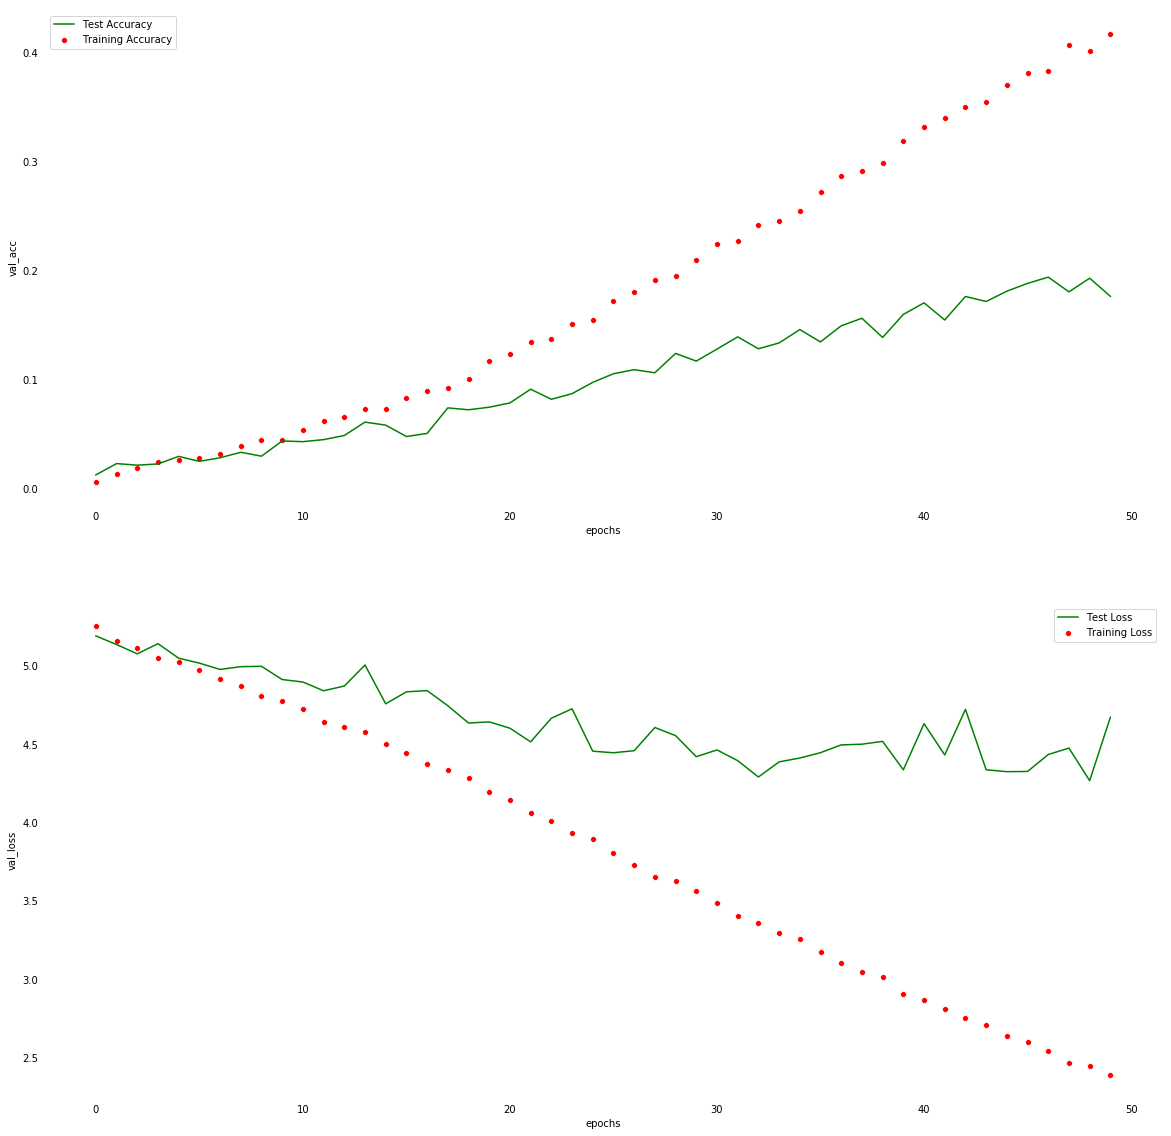

In [10]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters